In [1]:
import numpy as np
import cv2
import math
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

# show plot first run
%matplotlib inline 
# test autocompletion with tab or tab+shift
%config IPCompleter.greedy=True 

###############################################################
#
# Write your own descriptor / Histogram of Oriented Gradients
#
###############################################################

def im2double(im):
    """
    Converts uint image (0-255) to double image (0.0-1.0) and generalizes
    this concept to any range.

    :param im:
    :return: normalized image
    """
    min_val = np.min(im.ravel())
    max_val = np.max(im.ravel())
    
    #if (max_val - min_val) == 0:
        # create empty image!
        
    out = (im.astype('float') - min_val) / (max_val - min_val)
    return out

def plot_histogram(hist, bins):
    width = 0.5 #0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.xlim((-0.2,2*np.pi))
    plt.bar(center, hist, align='center', width=width)
    plt.show()


def compute_simple_hog(imgcolor, keypoints):

    # convert color to gray image and extract feature in gray
    gray = cv2.cvtColor(imgcolor, cv2.COLOR_BGR2GRAY)
    imgnorm = np.float32(gray)
    # 2. convert image to 0-1 image (see im2double)
    #imgnorm = im2double(gray)
    # compute x and y gradients (sobel kernel size 5)

    sobelx = cv2.Sobel(imgnorm, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(imgnorm, cv2.CV_64F, 0, 1, ksize=5)
    
    # compute magnitude and angle of the gradients
    phase=cv2.phase(sobelx,sobely,True)
    # Calculate the magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # print(phase)
    #cv2.imshow("Phase", phase+0.5)
    #cv2.imshow("Magni",gradmag )
    #cv2.waitKey(0) 
    #cv2.destroyAllWindows()

    # go through all keypoints and and compute feature vector
    descr = np.zeros((len(keypoints), 8), np.float32)
    count = 0
    for kp in keypoints:
        #print(kp.pt, kp.size)
        halfsize = int(kp.size/2)
        
        # get indices
        sub = gradmag[int(kp.pt[0])-halfsize:int(kp.pt[0])+halfsize+1,
                int(kp.pt[1])-halfsize:int(kp.pt[1])+halfsize+1]
        seriell = np.ravel(sub)
        # select valid phases
        sub = phase[int(kp.pt[0])-halfsize:int(kp.pt[0])+halfsize+1,
                int(kp.pt[1])-halfsize:int(kp.pt[1])+halfsize+1]
        phaseseriell = np.ravel(sub)
        validphase = phaseseriell[seriell>0]
        print(len(validphase))
        
        # create histogram of angle in subwindow BUT only where magnitude of gradients is non zero! Why? Find an
        # answer to that question use np.histogram
        (hist, bins) = np.histogram(validphase,bins=8)

        plot_histogram(hist, bins)

        descr[count] = hist
        count+=1
    return descr

121


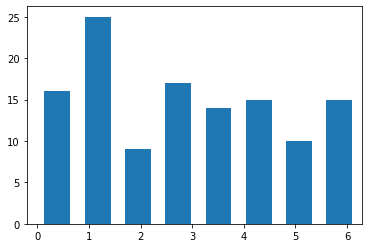

In [4]:
keypoints = [cv2.KeyPoint(15, 15, 11)]
#print(len(keypoints))

# test for all test images
test = cv2.imread('./images/hog_test/circle.jpg')
#test = cv2.imread('./images/hog_test/diag.jpg')
#test = cv2.imread('./images/hog_test/horiz.jpg')
#test = cv2.imread('./images/hog_test/vert.jpg')

descriptor = compute_simple_hog(test, keypoints)